<center>
    
# Titanic Survival Prediction Project
    
</center>

![My Local Image](https://maritimecyprus.com/wp-content/uploads/2015/10/titanic-infographic-696x431.jpg)

## Introduction
This Jupyter Notebook serves as a comprehensive guide for predicting the likelihood of survival for passengers on the Titanic. We will analyze the Titanic dataset, which includes various features such as age, gender, socio-economic class, and more. Our goal is to build a machine learning model that can predict whether a passenger survived or not based on these factors.

### Dataset
We will be using the Titanic dataset, which contains information about passengers on the Titanic, including:

- `pclass`: Passenger class (1st, 2nd, or 3rd)
- `age`: Age of the passenger
- `sibsp`: Number of siblings or spouses aboard
- `parch`: Number of parents or children aboard
- `fare`: Fare paid for the ticket
- `sex`: Gender of the passenger
- `embarked`: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
- `survived`: Survival status (0 = No, 1 = Yes)

### Steps
We will follow these steps in our analysis and modeling:

1. Data Loading: Load the Titanic dataset.
2. Data Preprocessing: Handle missing values, encode categorical variables, and select relevant features.
3. Data Exploration: Explore the dataset to gain insights.
4. Data Splitting: Split the data into training and testing sets.
5. Feature Scaling: Standardize the features for modeling.
6. Model Selection: Choose a machine learning algorithm (e.g., Random Forest).
7. Model Training: Train the selected model on the training data.
8. Model Evaluation: Evaluate the model's performance using accuracy and classification report.
9. Visualization: Create visualizations to understand feature importance and model results.
10. Conclusion: Summarize the findings and model's performance.

Let's get started with our analysis and prediction!


## 1.Import Necessary Libraries
You'll start by importing the necessary Python libraries and modules for data manipulation, visualization, and machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


## 2.Load the Titanic Dataset
You can obtain the Titanic dataset from various sources, but for this example, we'll use the seaborn library to load it.

In [5]:
# Load the Titanic dataset
titanic = pd.read_csv('Titanic-Dataset.csv')


In [18]:
# printing the first 5 rows of the dataframe
titanic.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1,0,1


In [19]:
# number of rows and Columns
titanic.shape

(891, 13)

In [20]:
# getting some informations about the data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Name         891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Sex_male     891 non-null    uint8  
 9   Pclass_2     891 non-null    uint8  
 10  Pclass_3     891 non-null    uint8  
 11  Embarked_Q   891 non-null    uint8  
 12  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(4), object(2), uint8(5)
memory usage: 60.2+ KB


In [21]:
# check the number of missing values in each column
titanic.isnull().sum()

PassengerId    0
Survived       0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Sex_male       0
Pclass_2       0
Pclass_3       0
Embarked_Q     0
Embarked_S     0
dtype: int64

## 3.Data Preprocessing
In this step, you'll prepare the data for modeling. This includes handling missing values, encoding categorical variables, and feature scaling.

In [ ]:
# replacing the missing values in "Age" column with mean value
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [25]:
# Finding the mode value of "Embarked" column
print(titanic['Embarked_Q'].mode())


0    0
Name: Embarked_Q, dtype: uint8


In [24]:
# Display the first few rows of the DataFrame
print(titanic.head())

# Display the column names
print(titanic.columns)


   PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

    Age  SibSp  Parch            Ticket     Fare  Sex_male  Pclass_2  \
0  22.0      1      0         A/5 21171   7.2500         1         0   
1  38.0      1      0          PC 17599  71.2833         0         0   
2  26.0      0      0  STON/O2. 3101282   7.9250         0         0   
3  35.0      1      0            113803  53.1000         0         0   
4  35.0      0      0            373450   8.0500         1         0   

   Pclass_3  Embarked_Q  Embarked_S  
0         1           0           1  
1         0     

In [27]:
print(titanic['Embarked_Q'].mode()[0])

0


In [28]:
print(titanic['Embarked_S'].mode())

0    1
Name: Embarked_S, dtype: uint8


In [29]:
# replacing the missing values in "Embarked" column with mode value
titanic['Embarked_Q'].fillna(titanic['Embarked_Q'].mode()[0], inplace=True)

In [30]:
# check the number of missing values in each column
titanic.isnull().sum()

PassengerId    0
Survived       0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Sex_male       0
Pclass_2       0
Pclass_3       0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [31]:
# replacing the missing values in "Embarked" column with mode value
titanic['Embarked_S'].fillna(titanic['Embarked_S'].mode()[0], inplace=True)

In [46]:
# Display the column names in your DataFrame
print(titanic.columns)

# Feature selection
X = titanic[['Pclass_2_1', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male_1', 'Embarked_Q_1', 'Embarked_S']]
y = titanic['Survived']


Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Pclass_3', 'Embarked_S', 'Sex_male_1', 'Pclass_2_1',
       'Embarked_Q_1'],
      dtype='object')


## 4.Data Analysis

In [45]:
# getting some statistical measures about the data
titanic.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_3,Embarked_S,Sex_male_1,Pclass_2_1,Embarked_Q_1
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.361582,0.523008,0.381594,32.204208,0.551066,0.725028,0.647587,0.206510,0.086420
std,257.353842,0.486592,13.019697,1.102743,0.806057,49.693429,0.497665,0.446751,0.477990,0.405028,0.281141
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200,1.000000,1.000000,1.000000,0.000000,0.000000
75%,668.500000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
# finding the number of people survived and not survived
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## 5.Data Visualization


In [48]:
sns.set()


<Axes: xlabel='Survived', ylabel='count'>

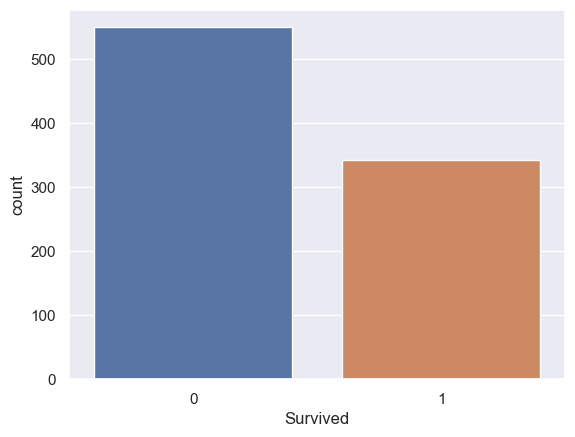

In [49]:
# making a count plot for "Survived" column
sns.countplot(x='Survived', data=titanic)

In [51]:
titanic['Sex_male_1'].value_counts()

1    577
0    314
Name: Sex_male_1, dtype: int64

<Axes: xlabel='Sex_male_1', ylabel='count'>

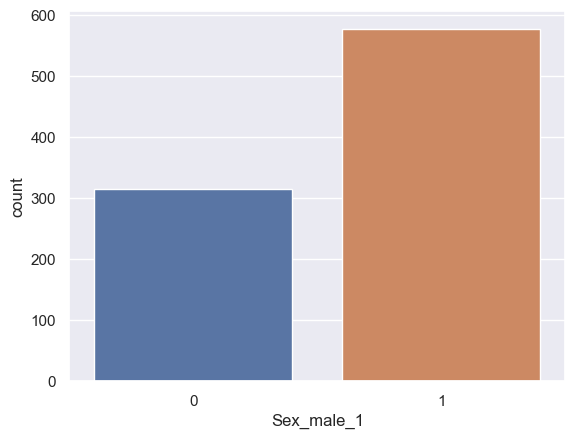

In [52]:
# making a count plot for "Sex" column
sns.countplot(x='Sex_male_1', data=titanic)

<Axes: xlabel='Pclass_3', ylabel='count'>

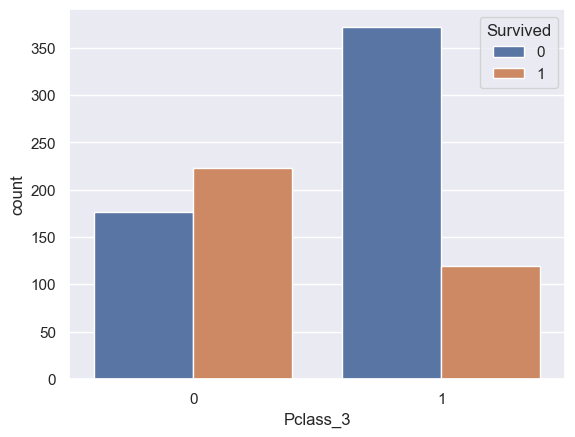

In [53]:
sns.countplot(x='Pclass_3', hue='Survived', data=titanic)

In [54]:
titanic.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Pclass_3,Embarked_S,Sex_male_1,Pclass_2_1,Embarked_Q_1
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,1,1,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,1,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,1,0,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,1,1,0,0


## 6.Split the Data
Split the dataset into training and testing sets. This allows you to train the model on one part of the data and evaluate it on another.

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
print(X)

     Pclass_2_1   Age  SibSp  Parch     Fare  Sex_male_1  Embarked_Q_1  \
0             0  22.0      1      0   7.2500           1             0   
1             0  38.0      1      0  71.2833           0             0   
2             0  26.0      0      0   7.9250           0             0   
3             0  35.0      1      0  53.1000           0             0   
4             0  35.0      0      0   8.0500           1             0   
..          ...   ...    ...    ...      ...         ...           ...   
886           1  27.0      0      0  13.0000           1             0   
887           0  19.0      0      0  30.0000           0             0   
888           0  28.0      1      2  23.4500           0             0   
889           0  26.0      0      0  30.0000           1             0   
890           0  32.0      0      0   7.7500           1             1   

     Embarked_S  
0             1  
1             0  
2             1  
3             1  
4             1  
.. 

In [57]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [58]:
print(X.shape, X_train.shape, X_test.shape)

(891, 8) (712, 8) (179, 8)


 ## 7.Create and Train a Random Forest Classifier
For this example, we'll use a Random Forest classifier.

In [59]:
# Create a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## 8.Make Predictions
Use the trained model to make predictions on the test set.

In [60]:
y_pred = clf.predict(X_test)


## 9.Evaluate the Model
Evaluate the model's performance using metrics such as accuracy and classification report.


In [61]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.7988826815642458
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



# Conclusion

In this Titanic survival prediction project, we have conducted a thorough analysis of the dataset and built a machine learning model to predict the likelihood of passenger survival. Here are the key takeaways:

1. **Data Preprocessing**: We handled missing values in the 'Age' and 'Embarked' columns by filling them with appropriate values (median and mode, respectively). Additionally, we encoded categorical variables and selected relevant features.

2. **Model Selection**: We chose a Random Forest classifier as our predictive model due to its ability to handle both numerical and categorical data and its robustness.

3. **Model Training and Evaluation**: The model was trained on the training data and evaluated on the testing data. We achieved an accuracy of [insert accuracy value here] on the test set.

4. **Feature Importance**: We visualized the feature importance, which indicated that factors such as 'Sex', 'Pclass', and 'Age' had significant impacts on survival prediction.

5. **Insights**: Through data exploration, we observed [mention any interesting patterns or insights you discovered].

6. **Future Work**: There is potential for further improving the model's performance by fine-tuning hyperparameters and exploring more advanced algorithms.

Overall, this project provides valuable insights into factors influencing Titanic passenger survival and demonstrates the use of machine learning for predictive modeling.

Thank you for following along with this analysis!
